# Convolutional Neural Network (CNN)

Convolutonal Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussng CNNS, several key terms and concepts come into play:

- **Convolutional Layer:** This layer applies convolutional operations to the input, producgin feature maps. It is the core building block of a CNN. 
   - **Convolutional Operation:** This operation involves a `kernae` or (`filter`) that is passed over the input data, performing elemnt-wise muliplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.

In [3]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load the MNIST dataset 
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

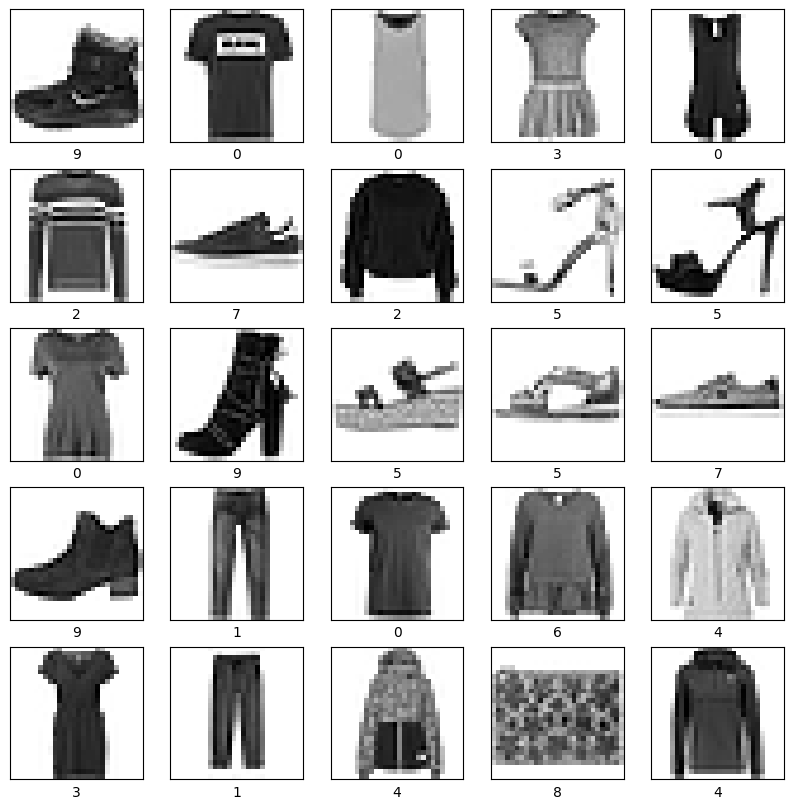

In [5]:
# Display some sample images 
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

In [6]:
# explore the data 
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size fo the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size fo the images is (28, 28).


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
60000-1

59999

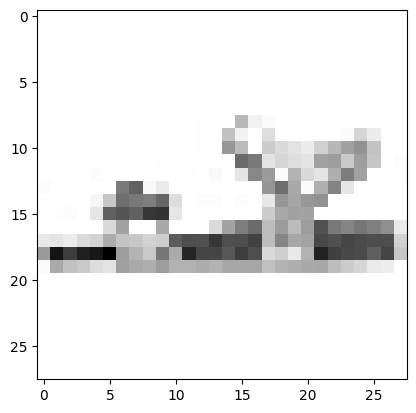

In [11]:
plt.imshow(X_train[59999], cmap=plt.cm.binary)

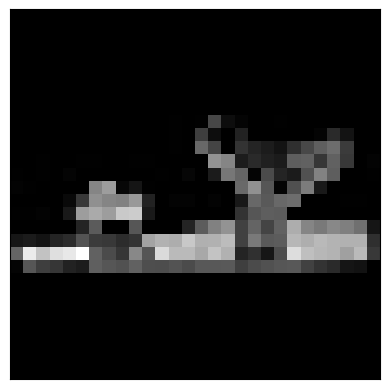

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   1  71  13   4   0   0   

In [12]:
# Display the first image in the dataset as a data matrix 

plt.imshow(X_train[59999], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


# Display the values of each pixel in the image 

print("Pixel values:")

for row in X_train[59999]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [13]:
# also need to change the data type of float32 Data Normalize 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [14]:
# Display the values of each pixel in the image after normalization 
print('\n Pixel values after normalization:')
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()


 Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482

# Build the model 

In [15]:
# Create an input layer 
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))


In [17]:
# CNN model building 

model = tf.keras.Sequential([
    input_layer, 
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    # filter is the number of filters we want to apply
    # kernal is the size fo window/filter moving over the image 
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), 
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(), 

    layers.Flatten(), 
    layers.Dense(10, activation='softmax')

])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

In [21]:
# Compile the model 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2162 - accuracy: 0.9214 - val_loss: 0.2882 - val_accuracy: 0.8956
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2139 - accuracy: 0.9208 - val_loss: 0.2961 - val_accuracy: 0.8982
Epoch 3/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2129 - accuracy: 0.9217 - val_loss: 0.2857 - val_accuracy: 0.9010
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2131 - accuracy: 0.9224 - val_loss: 0.2894 - val_accuracy: 0.8983
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2122 - accuracy: 0.9223 - val_loss: 0.2961 - val_accuracy: 0.9009
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2108 - accuracy: 0.9234 - val_loss: 0.2816 - val_accuracy: 0.9012
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2084 - accuracy: 0.9233 - val_loss: 0.2852 - v

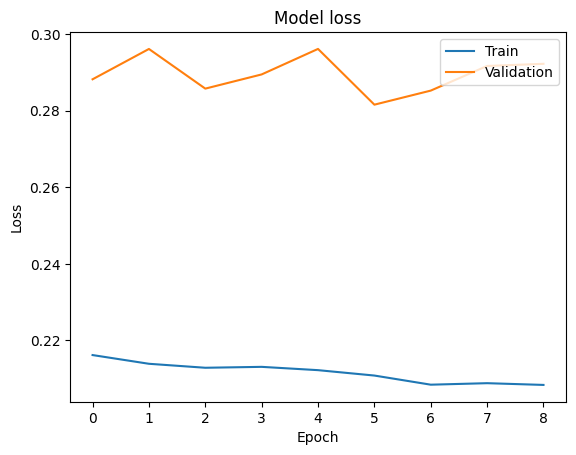

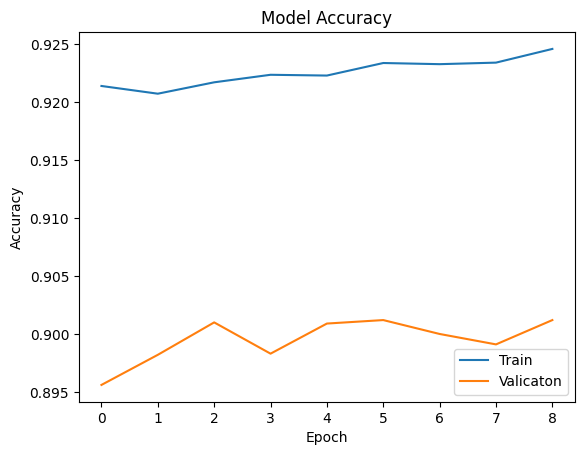

CPU times: total: 44.2 s
Wall time: 1min 33s


In [31]:
%%time 

# Define the callback function 
early_stopping = EarlyStopping(patience=3)

# train the model and plot the training and testiong loss and accuracy at each epoch 
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
callbacks=[early_stopping])


# Evaluation the model (using Mean squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss



# plotting the training and testion loss 

import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



# plot the accuracy of training ans validation 

# plotting the training and validation accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valicaton'], loc='lower right')
plt.show()

In [32]:
# Evaluate the model 
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9012
Test Loss: 0.29222017526626587
Test Accuracy: 0.901199996471405


In [33]:
# Save the model to be used later 
model.save("models_saved/fshion_mnist_cnn.h5")

c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predicting an image

In [34]:
# grab an image 
img = X_test[10]
print(img.shape)

(28, 28)


(28, 28, 1)


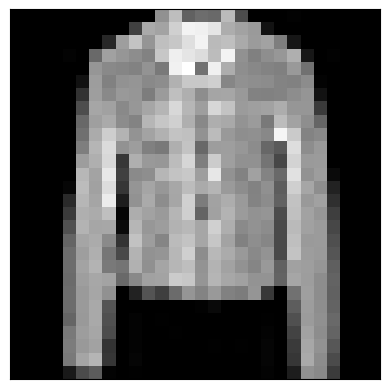

1/1 [==============================] - 0s 111ms/step
The model predicts that this image is a 4.


In [36]:
## reshape the image to(28, 28, 1)
img= img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


# predict the image 
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")